# TensorFlow Basics

There is a vast amount of material freely available on deep learning in general, and TensorFlow in particular. Although we introduce several useful techniques in this notebook, to become very proficient in TensorFlow you will have to explore further on your own. 

Useful links to get you started, include:

1. A good place to start: https://www.tensorflow.org/get_started/get_started
2. Various other tutorials are here: https://www.tensorflow.org/versions/r0.10/tutorials/index.html
3. Aurélien Géron’s set of notebooks to complement his equally informative book, Hands-On Machine Learning with Scikit-Learn & TensorFlow.


Deep neural networks often involve a huge number of trainable parameters, easily of the order of tens of millions. This large number of parameters requires a vast amount of training data, and the computational resources to handle all of this. TensorFlow is designed for exactly this purpose, as described in the 2015 whitepaper http://download.tensorflow.org/paper/whitepaper2015.pdf. 

One of the important design issues is that of scalability. TensorFlow should be able to take advantage of whatever computational power is available, whether it is the CPU on your cell phone or laptop, multiple GPU’s, or distributed machines. To allow this, TensorFlow has a very different design than more traditional programming languages such as Python, Java and C++, among others. In NumPy, for example, the different methods (like SVD, EIG, etc.) reside outside Python where compiled code is run. If not, everything will be slow. In TensorFlow, everything is run outside Python (assuming you use the Python API as we will do in these tutorials).  

To achieve this, and also to take advantage of the available computational power, TensorFlow computations proceed in two steps. First, a computational graph is constructed. The nodes represent abstract operations, such as matrix multiplication or function evaluation. Each node receives zero or more data-inputs, and zero or more outputs. The data, in the form of tensors, flow along the edges. During this first stage, the computational graph is constructed symbolically. It is important to keep in mind that, at this stage, no computations whatsoever are performed. In fact, at this point, the graph is empty – that is, it only exists symbolically. The second execution stage is when the graph is populated with values and when the operations are executed. This happens by creating a session. 

It is perhaps best to illustrate this with a very simple example:

In [23]:
# Import the necessary modules
import IPython.display
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.facecolor'] = "0.92"

In [47]:
tf.compat.v1.disable_eager_execution()

In [118]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [24]:
print(tf.version)

<module 'tensorflow_core._api.v2.version' from '/Users/andreachello/anaconda3/envs/datascience/lib/python3.7/site-packages/tensorflow_core/_api/v2/version/__init__.py'>


### Let's start by initialising two contants, called matrix1 and matrix 2

Note that you cannot do anything with these constants. They need to be launched in a **session** first. You can't even print their values. Try for example to run **matrix1.eval** 

TensorFlow constants are exactly what their name implies: they are assigned values, and cannot be changed.

It is always a good idea to reset the default graph. If not, a second execution of the cell will add to the previously constructed, and still existing graph.

In [70]:
tf.reset_default_graph()

matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])

Let's look at the constants. It is not quite what you would expect because at this point they are simply nodes in the computational graph. We'll get hold of their values below. 

In [71]:
print('matrix1:', matrix1, 'matrix2', matrix2)

matrix1: Tensor("Const:0", shape=(1, 2), dtype=float32) matrix2 Tensor("Const_1:0", shape=(2, 1), dtype=float32)


### Create a matrix multiplication op

In [73]:
product = tf.matmul(matrix1, matrix2)

In [74]:
product

<tf.Tensor 'MatMul:0' shape=(1, 1) dtype=float32>

### Launch graph in a session

This constructs the computational graph so that you can do something with it. If you launch a session, resources such as the CPU or GPU are automatically allocated to the session. You can also do this manually if, for example, you have more than one GPU, or you want to do distributed computing.


In [75]:
with tf.Session() as sess:
    result = sess.run(product)

After the session is closed, all TensorFlow tensors and ops cease to exist. What about the **result** computed above? Let's investigate

#### Tensor Product:

$$
\mathbf{x} \otimes \mathbf{y}=
\begin{aligned}
\left[\begin{array}{l}
x_{1} \\
x_{2}
\end{array}\right] \otimes\left[\begin{array}{l}
y_{1} \\
y_{2}
\end{array}\right] =\left[\begin{array}{l}
x_{1} y_{1} \\
x_{1} y_{2} \\
x_{2} y_{1} \\
x_{2} y_{2}
\end{array}\right]
\end{aligned}
$$

$$
\mathbf{x} \otimes \mathbf{y}=
\begin{aligned}
\left[\begin{array}{l}
3 \\
3
\end{array}\right] \otimes\left[\begin{array}{l}
2 \\
2
\end{array}\right] =\left[\begin{array}{l}
3 \times 2 \\
3 \times 2 \\
\end{array}\right]
= \big[ 12 \big]
\end{aligned}
$$

In [76]:
print(result)
print(type(result))

[[12.]]
<class 'numpy.ndarray'>


**result** is actually a NumPy array and therefore persists after the session is closed. 

### Note:
* All ops lower down in the graph – i.e. the dependencies of **product** in the case the constant ops, **matrix1** and **matrix2**, are first executed.
* matmul is matrix multiplication – not for example,  pointwise multiplication
* It is important to close the session when you are done in order to save resources. (We used the "with funciton" to do this)
* Better to use interactive sessions if you work in iPython or Jupyter.
* Close the session before you run the cell a second time.



Let's find the values of the constants we defined above.

In [77]:
with tf.Session() as sess:
    print('matrix1:', matrix1.eval(),'matrix2', matrix2.eval())

matrix1: [[3. 3.]] matrix2 [[2.]
 [2.]]


Here is another way of starting a session. This is particularly useful for interactive sessions, as we use here.

In [78]:
sess = tf.InteractiveSession()

x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

# Initialize 'x' using the run() method of its initializer op.
x.initializer.run()

# Add an op to subtract 'a' from 'x'.  Run it and print the result
sub = x - a
print(sub.eval())

sess.close()

[-2. -1.]


### Variables and placeholders

The next important data structures are the *variable* and *placeholder*. You can think of the *variables* as your trainable parameters. 

In fact, by declaring something a variable, TensorFlow's **tf.gradients()** method will automatically calculate the gradient of a cost function with respect to all the specified variables.

All variables need to be explicitly initialized. Also, since variables are trainable parameters, they are assigned initial values during declaration.

**Placeholder**s are, as the name implied, waiting for values to be assigned to them during execution. Note that **tf.gradients()** ignore placeholders. Typically, you will feed your training or test *data* into placeholders during execution, using a dictionary feed. 

Read more on the subject here: https://www.tensorflow.org/versions/r0.10/how_tos/variables/index.html

**Note:** 

There are multiple ways of launching sessions. We provide one important example: 




In [79]:
tf.reset_default_graph()

# Create a Variable, that will be initialized to the scalar value 0.
state = tf.Variable(0, name="counter")

# Create an update Op.
update = tf.assign(state, state + 1)

# Variables must be initialized by running an `init` Op after having
# launched the graph.  We first have to add the `init` Op to the graph.
init_op = tf.global_variables_initializer()

# Launch the graph and run the ops.
with tf.Session() as sess:
    
  # Run the 'init' op. 
  sess.run(init_op)
    
  # Print the initial value of 'state'
  print(state.eval())
    
  # Run the op that updates 'state' and print 'state'. Note that the graph is executed several times.
  for _ in range(3):
    sess.run(update)
    print(state.eval())

0
1
2
3


Note that all the tensors are cleared when the session is closed. So, how do we get hold of a variable outside the session? One has to assign it to a NumPy array.

In [80]:
# Note that this will fail, as expected
print(state.eval())

ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

Let's assign it to a NumPy array.

In [81]:
tf.reset_default_graph()

# Create a Variable, that will be initialized to the scalar value 0.
state = tf.Variable(0, name="counter")

# Create an Op to add one to `state`.
update = tf.assign(state, state + 1)

# Create the init Op
init_op = tf.global_variables_initializer()

# Launch the graph and run the Ops.
with tf.Session() as sess:
    
    # Run the 'init' op. 
    sess.run(init_op)
    
    # Print the initial value of 'state' in two different ways
    print(sess.run(state))
  
    # Run the op that updates 'state' and print 'state'. Note that the graph is executed several times.
    for _ in range(3):        
        sess.run(update)
        print(state.eval())
        
    val = state.eval()


0
1
2
3


In [61]:
# Now we have extracted the final value of state
print(val)

3


### Multiple outputs

Below is an example of how you can fetch multiple tensors at the same time. The values (NumPy arrays) of the different tensors are returned in a list. 

Note that the graph is executed only once.

In [82]:
tf.reset_default_graph()

# Declarations
input1 = tf.constant([3.0])
input2 = tf.constant([2.0])
input3 = tf.constant([5.0])

# Calculations
intermed = tf.add(input2, input3)
mul = input1 * intermed

# Run session
with tf.Session() as sess:
    result = sess.run([mul, intermed])
    print(result)
    print(result[1])
    print(result[0][0])

[array([21.], dtype=float32), array([7.], dtype=float32)]
[7.]
21.0


# Placeholders and feed

When creating placeholders, you can feed them values when you execute the graph. 

The placeholders are *fed* through dictionaries.

Note that you input arrays and the outputs are also arrays.


In [85]:
tf.reset_default_graph()

# Declarations
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

# Calculations
output = input1 * input2

# Run session
with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1: 7., input2: 2. }))

14.0


## Linear regression example

In this case the model is of the form, $$ y = w x + b $$
and the idea is to estimate $w$ and $b$ given $(x,y)$ pairs.

Although one can solve the system using the normal equations, we are going to use TensorFlow's built-in gradient calculator to solve the system using gradient descent. 

Let’s first generate some data:

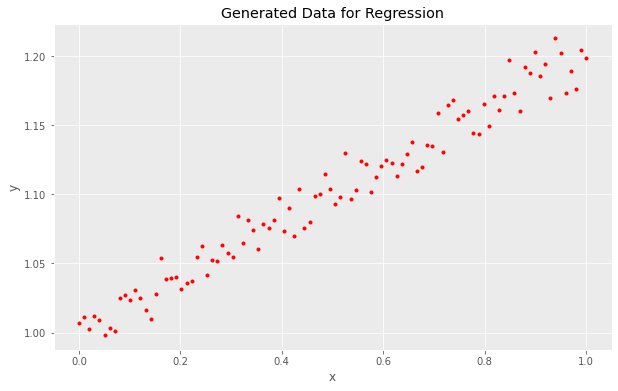

In [87]:
# Generate data
x_train = np.linspace(0, 1, 100)
y_train = 0.2 * x_train + 1 + 0.01 * np.random.randn(x_train.shape[0])

plt.plot(x_train, y_train, 'r.')
plt.title('Generated Data for Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [88]:
tf.reset_default_graph()

# Set hyperparameter
learning_rate = 0.001

# Model parameters (variables). Initialised with values not close to the correct values.
w = tf.Variable([-3.], dtype=tf.float32)
b = tf.Variable([3.], dtype=tf.float32)

# Model input (placeholders)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Linear model
linear_model = w * x + b

# loss
mse = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares

#Gradient
grad = tf.gradients(mse, [w, b])

# Gradient descent update
update_w = tf.assign(w, w - learning_rate * grad[0])
update_b = tf.assign(b, b - learning_rate * grad[1])

# Define init Op
init_op = tf.global_variables_initializer()

# Execution
with tf.Session() as sess:
    sess.run(init_op)

    # Descend for 1000 steps
    for i in range(1000):
        # print loss at every 100th step
        if i%100 == 0:
            print('mse = ',sess.run(mse, feed_dict = {x:x_train, y:y_train}))
            
        sess.run([update_w, update_b], {x:x_train, y:y_train})

    # evaluate training accuracy
    curr_W, curr_b, curr_mse = sess.run([w, b, mse], {x:x_train, y:y_train})
    print("w: %s b: %s loss: %s"%(curr_W, curr_b, curr_mse))

mse =  103.01018
mse =  6.400785
mse =  0.4417672
mse =  0.041341662
mse =  0.014434661
mse =  0.012626598
mse =  0.012505095
mse =  0.012496952
mse =  0.012496393
mse =  0.012496361
w: [0.20076185] b: [1.0008873] loss: 0.012496373


As you can see, the results above are very close to 0.2 W and 1 b that we set. The reason for the slight difference is the error that we introduced: **0.01*np.random.randn(x_train.shape[0])**.

Experiment with the learning rate and the number of training steps and see how that affects your accuracy.

## Let's use TensorFlow's built-in optimiser

Again, we first reset the default graph.

In [89]:
tf.reset_default_graph()

# Variables
w = tf.Variable([-0.3], dtype=tf.float32)
b = tf.Variable([0.3], dtype=tf.float32)

# Placeholders
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Linear model
linear_model = w * x + b

# loss
mse = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(0.001)
train_step = optimizer.minimize(mse)

init_op = tf.global_variables_initializer()

# Execute
with tf.Session() as sess:
     
    sess.run(init_op)
    
    # 1000 steps
    for i in range(1000):
        # Print loss every 100 steps
        if i%100 == 0:
            print('mse = ', sess.run(mse, feed_dict = {x:x_train, y:y_train}))
        
        sess.run(train_step, feed_dict = {x:x_train,y:y_train})
    
    # Print final results
    print('w : ',w.eval(),'b : ', b.eval())

mse =  92.635506
mse =  0.01797753
mse =  0.012864686
mse =  0.012521104
mse =  0.01249803
mse =  0.012496471
mse =  0.012496363
mse =  0.012496359
mse =  0.012496369
mse =  0.012496355
w :  [0.20076449] b :  [1.000886]


# Visualisation using TensorBoard

TensorFlow provides a convenient utility of visualizing the computation graph, called TensorBoard. Computation graphs quickly become quite complicated, and this is reflected in the computation graphs. It is, therefore, important to effectively visualize the computation graph. One of the convenient mechanisms is the **tf.name_scope( )**. This allows one to group tensors that belong together under the same named scope. This is something you probably want to do anyway, to organize your code, regardless of whether you are going to use the visualizations.

Apart from the visualization, TensorBoard also allows one to visualize how quantities – such as the loss function – change during training.

### Let's do this systematically, and first just add the name scopes.  

In [90]:
tf.reset_default_graph()

learning_rate = 0.001

# Model parameters (variables). Now organised under the same named scope
# It is important to name the variables; this is what will be used in tensorboard
with tf.name_scope('variables') as scope:
    w = tf.Variable([-3.], dtype=tf.float32, name = 'w')
    b = tf.Variable([3.], dtype=tf.float32, name = 'b')

# Model input (placeholders)
with tf.name_scope('placeholders') as scope:
    x = tf.placeholder(tf.float32, name = 'x')
    y = tf.placeholder(tf.float32, name = 'y')

# Linear model
with tf.name_scope('model') as scope:
    linear_model = w * x + b
    mse = tf.reduce_sum(tf.square(linear_model - y), name = 'mse') 
    grad = tf.gradients(mse, [w, b], name = 'grad')

# Gradient descent update
with tf.name_scope('training') as scope:
    update_w = tf.assign(w, w - learning_rate * grad[0], name = 'update_w')
    update_b = tf.assign(b, b - learning_rate * grad[1], name = 'update_b')

# Define init Op
with tf.name_scope('init_op') as scope:
    init_op = tf.global_variables_initializer()

# Execution
with tf.Session() as sess:
    sess.run(init_op)
    
    graph = tf.get_default_graph()
    
    # In order to see how the naming convention has changed, let's print the variable names
    var = [v.name for v in tf.trainable_variables()]
    print(var)
    
    # 1000 steps
    for i in range(1000):
        # Report loss every 100 steps
        if i%100 == 0:
            print('mse = ',sess.run(mse, feed_dict = {x:x_train, y:y_train} ))
        
        sess.run([update_w, update_b], {x:x_train, y:y_train})

    # evaluate training accuracy
    final_w, final_b, final_mse = sess.run([w, b, mse], {x:x_train, y:y_train})
    print("w: %s b: %s mse: %s"%(final_w, final_b, final_mse))
    
    # One can also retrieve the trained values of the variables directly from the graph.
    w = graph.get_tensor_by_name("variables/w:0").eval()
    b = graph.get_tensor_by_name("variables/b:0").eval()
    
    print()
    print("w: %s b: %s "%(final_w, final_b))

['variables/w:0', 'variables/b:0']
mse =  103.01018
mse =  6.400785
mse =  0.4417672
mse =  0.041341662
mse =  0.014434661
mse =  0.012626598
mse =  0.012505095
mse =  0.012496952
mse =  0.012496393
mse =  0.012496361
w: [0.20076185] b: [1.0008873] mse: 0.012496373

w: [0.20076185] b: [1.0008873] 


### Adding the ops needed for TensorBoard.

First, we need to define a log directory. Since we probably want a new log for each run, we conveniently use the date-time of the run as the naming convention

In [91]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [92]:
tf.reset_default_graph()

learning_rate = 0.001

# Model parameters (variables). Now organised under the same named scope
# It is important to name the variables; this is what will be used in tensorboard
with tf.name_scope('variables') as scope:
    w = tf.Variable([-3.], dtype=tf.float32, name = 'w')
    b = tf.Variable([3.], dtype=tf.float32, name = 'b')

# Model input (placeholders)
with tf.name_scope('placeholders') as scope:
    x = tf.placeholder(tf.float32, name = 'x')
    y = tf.placeholder(tf.float32, name = 'y')

# Linear model
with tf.name_scope('model') as scope:
    linear_model = w * x + b
    mse = tf.reduce_sum(tf.square(linear_model - y), name = 'mse') 
    grad = tf.gradients(mse, [w, b], name = 'grad')

# Gradient descent update
with tf.name_scope('training') as scope:
    update_w = tf.assign(w, w - learning_rate * grad[0], name = 'update_w')
    update_b = tf.assign(b, b - learning_rate * grad[1], name = 'update_b')


# Define init Op
with tf.name_scope('init_op') as scope:
    init_op = tf.global_variables_initializer()
    
# Define a saver Op that will allow us to save the graph
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

# Execution
with tf.Session() as sess:
    sess.run(init_op)
    
    graph = tf.get_default_graph()
    
    # 1000 steps
    for step in range(1000):
        # Report loss every 100 steps
        if step%100 == 0:
            summary_str = mse_summary.eval(feed_dict={x: x_train, y: y_train})
            file_writer.add_summary(summary_str, step)
        sess.run([update_w, update_b], {x:x_train, y:y_train})

file_writer.close()

If you now go to **tf_logs**, the name of the directory you created, you should see one or more (depending how many times you ran the code) files of the form, **run-20180520092455**

You now want to use TensorBoard. TensorBoard is launched on your command line, **tensorboard --logdir=path/to/log-directory** When is it running, it can be accessed on port 6006 in your browser, i.e. at **localhost:6006**. (Use this link if you get stuck: https://www.tensorflow.org/programmers_guide/summaries_and_tensorboard) 

You should see something like:

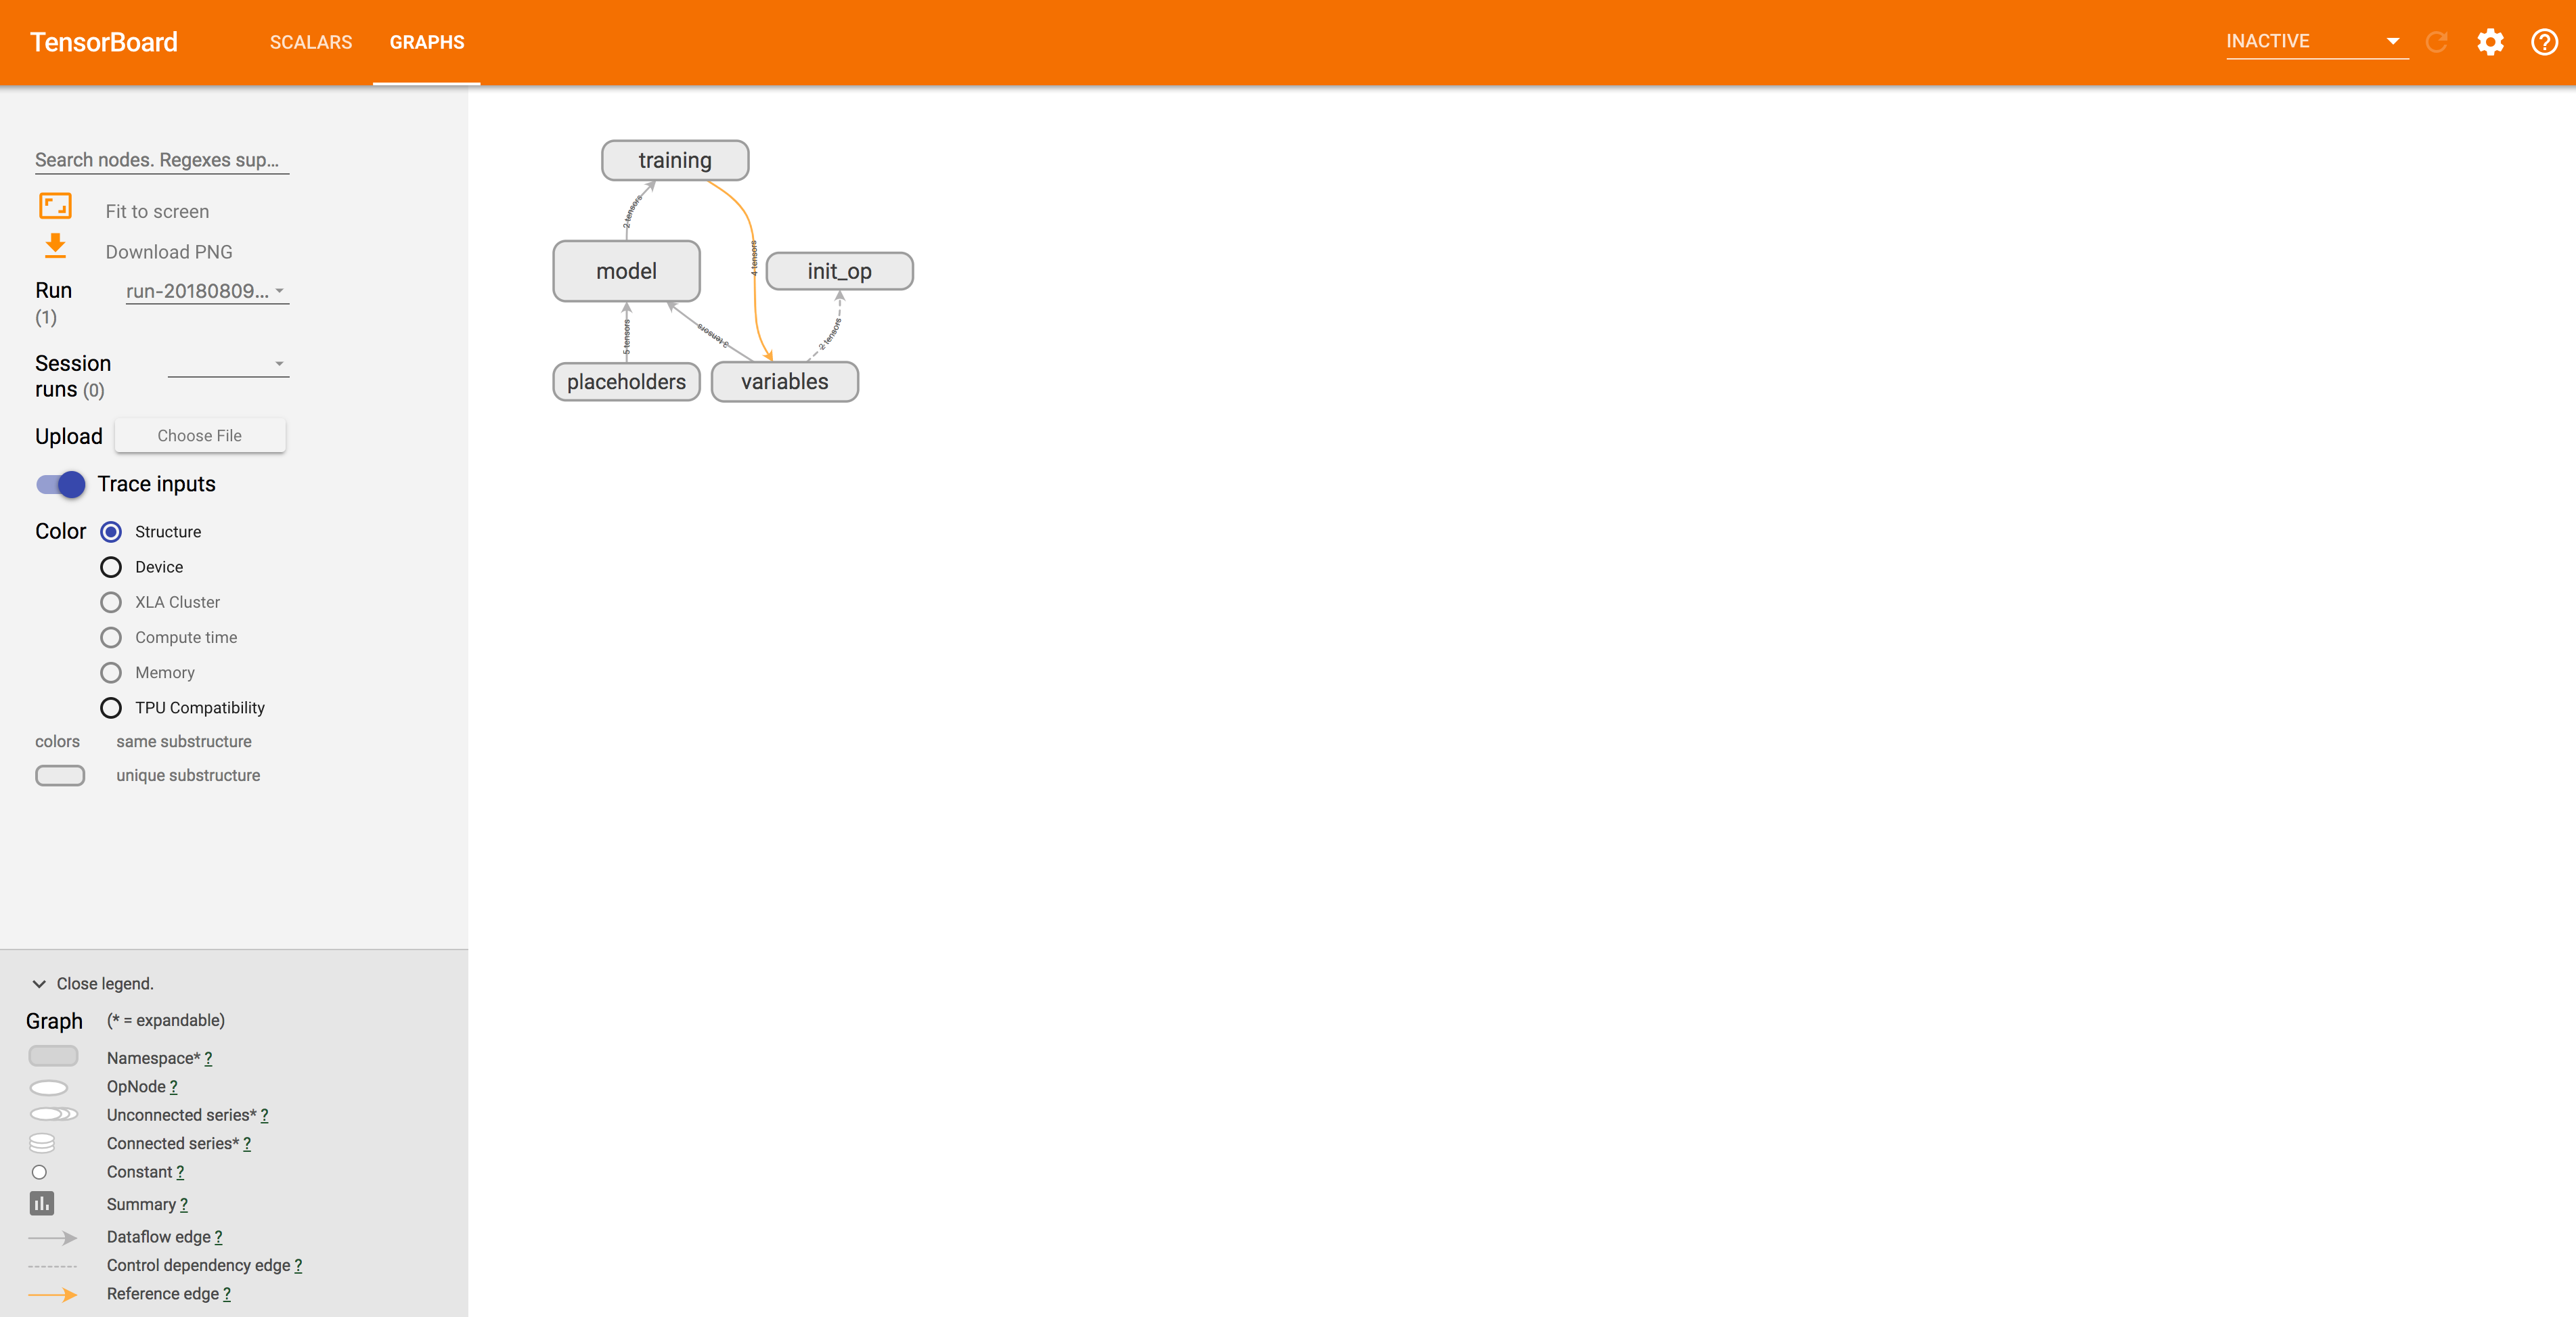

In [93]:
IPython.display.Image("./tf_logs/tensorboard.png")

# Access to the variables in a graph

If you need access to all the ops in a graph, you can do the following:



In [94]:
for op in tf.get_default_graph().get_operations():
    print(op.name)

variables/w/initial_value
variables/w
variables/w/Assign
variables/w/read
variables/b/initial_value
variables/b
variables/b/Assign
variables/b/read
placeholders/x
placeholders/y
model/mul
model/add
model/sub
model/Square
model/Rank
model/range/start
model/range/delta
model/range
model/mse
model/grad/Shape
model/grad/grad_ys_0
model/grad/Fill
model/grad/model/mse_grad/Shape
model/grad/model/mse_grad/Size
model/grad/model/mse_grad/add
model/grad/model/mse_grad/mod
model/grad/model/mse_grad/Shape_1
model/grad/model/mse_grad/range/start
model/grad/model/mse_grad/range/delta
model/grad/model/mse_grad/range
model/grad/model/mse_grad/Fill/value
model/grad/model/mse_grad/Fill
model/grad/model/mse_grad/DynamicStitch
model/grad/model/mse_grad/Maximum/y
model/grad/model/mse_grad/Maximum
model/grad/model/mse_grad/floordiv
model/grad/model/mse_grad/Reshape
model/grad/model/mse_grad/Tile
model/grad/model/Square_grad/Const
model/grad/model/Square_grad/Mul
model/grad/model/Square_grad/Mul_1
model/grad

Even for a very simple graph like this one, there are many ops – too many to inspect by hand if the graph gets even a little more involved. To keep track of the ops, in particular those that you may want to access later, there is a better way to do it. This brings us to the next topic.

# Saving and restoring a computational graph.

You have trained your model and now you want to take it into production. The one thing you do not want to do is to retrain every time you need to query the model. This means that you need to be able to save and restore the model.

Note that not only do you want to save the trained variables, but also the computation graph itself so that you don't need to build it from scratch every time you want to use it. This also makes it easy to share your trained model, without needing to provide the code of how you built the model in the first place.

The key idea is to add everything necessary to a collection.

To illustrate these ideas, we now turn to a more realistic problem, namely digit classification using the MNIST database.

The MNIST database consists of the order of 70,000 handwritten digits, divided into training-, validation-, and test-sets of 55,000, 5,000, and 10,000 images, respectively. 


In [113]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [116]:
from ipywidgets import interact

x,m,n = train_images.shape
number_to_show = 100

def show_digits(i=0):
    """
    Show some of the digits
    """
    im = np.reshape(train_images[i], (28,28))
    plt.imshow(im, cmap='viridis') 
    plt.title('The digits')
    
    plt.show()
    
w = interact(show_digits, i =(0, number_to_show)) 

interactive(children=(IntSlider(value=0, description='i'), Output()), _dom_classes=('widget-interact',))

Each image in the training set comes with a label. The idea is to build a classifier from the training data – that is, images and labels that can accurately predict the label of a new image.

To keep things simple, we build a straightforward SoftMax classifier. At this point, we are not interested in the accuracy of the system – the idea is to store the trained variables and graph for later use.

Much of the code below should already be familiar. Apart from using cross-entropy instead of MSE, a different optimizer, and a few other smaller details, the main novelty is the addition of the final statements where we add the ops that we plan to use later. Note that it is not necessary to add the trained variables to the collection since they are automatically added.

In [120]:
n_inputs = 28 * 28   # The size of each image
n_outputs = 10     # There are 10 digits, and therefore 10 classes
tf.reset_default_graph()

stddev = 2/np.sqrt(n_inputs)   

with tf.name_scope("variable"):
    W = tf.Variable(tf.truncated_normal((784,10), stddev=stddev), name="W")
    b = tf.Variable(tf.zeros([10]), name="b")
    
with tf.name_scope("placeholder"):
    x = tf.placeholder(tf.float32, shape=[None, 784], name="x")
    y_ = tf.placeholder(tf.float32, shape=[None, 10], name="y_") 

with tf.name_scope("output"):
    logits = tf.nn.softmax(tf.matmul(x,W) + b, name="logits")
    Y_prob = tf.nn.softmax(logits, name="Y_prob")


with tf.name_scope("train"):
    xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_, name="xentropy")
    loss = tf.reduce_mean(xentropy, name='loss')
    optimizer = tf.train.AdamOptimizer()
    train_op = optimizer.minimize(loss, name="train_op")
    
with tf.name_scope("eval"):
    correct = tf.equal(tf.argmax(logits,axis=1), tf.argmax(y_,axis=1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
    
with tf.name_scope("init_and_save"):
    init_op = tf.global_variables_initializer()
    saver = tf.train.Saver()  # We need to add a saver Op

# Now we add averything we'll need in future to a collection
tf.add_to_collection('train_var', train_op)
tf.add_to_collection('train_var', accuracy)
tf.add_to_collection('train_var', x)
tf.add_to_collection('train_var', y_)

In [128]:
n_epoch = 100  

with tf.Session() as sess:
    sess.run(init_op)
    
    graph = tf.get_default_graph()
    for epoch in range(n_epoch):   
        
        # One step of the training
        sess.run(train_op, feed_dict={x: train_images, 
                                         y_: train_labels})
        
        # Evaluate accuracy on the training set
        acc_train = accuracy.eval(feed_dict={x: train_images, 
                                             y_: train_labels})
        
        # Evaluate the accuracy on the test set. This should be 
        # smaller than the accuracy on the training set
        acc_test  = accuracy.eval(feed_dict={x: test_images,
                                             y_: test_labels})
        
        print(epoch, "Train accuracy:", acc_train, ",  Test accuracy:", acc_test)   
    
    # Print the variable names for later access.
    var = [v.name for v in tf.trainable_variables()]
    print(var) 
    
    weights = graph.get_tensor_by_name("variable/W:0").eval()
    bias  = graph.get_tensor_by_name("variable/b:0").eval()
    
    # Save the current values of the variables, the meta graph, and the collection
    # variables to files.
    save_path = saver.save(sess,"./test/test.ckpt")  
    saver.export_meta_graph(filename='./test/test.meta',
                            collection_list=["train_var"])
# print('weights:', weights)
# print('bias:', bias)

ValueError: Cannot feed value of shape (60000, 28, 28) for Tensor 'placeholder/x:0', which has shape '(?, 784)'

It might be interesting to look at the weights as images. Perhaps you will agree that the weights largely seem to emphasize those regions of the image that best distinguish between the digits. 

However, this was a bit of a digression – let's continue.

In [129]:
m,n = weights.shape

def show_weights(i=0):
    im = weights.T[i].reshape([28,28])
    plt.imshow(im, cmap='viridis') 
    plt.title('The weigths of filter '+str(i))
    plt.show()
    
w = interact(show_weights, i =(0, n-1)) 

NameError: name 'weights' is not defined

# Restoring the variables and the graph.

The previous training used only 100 training steps. This is far from the accuracy that can be achieved, even by the basic SoftMax classifier. The task we now set ourselves is to retrieve the graph, as well as the previously trained variables, and continue the training.

Crucially, we need to get access to the placeholders in order to feed the training data to the training process.

Note that we, as usual, clear the previous graph. We want to make sure we restore the previously saved graph.

Also note that we skip the construction phase in its entirety. 


### Everything we need should be restored from what we saved before



In [130]:
tf.reset_default_graph()

# We do need an Op for restoration!
saver = tf.train.import_meta_graph("./test/test.ckpt.meta")

with tf.Session() as sess:
    
    # We restore the session and the default graph
    # is the previously saved graph
    saver.restore(sess,"./test/test.ckpt")
    graph = tf.get_default_graph()
    
    # Check that we recognise the variables saved before.
    var = [v.name for v in tf.trainable_variables()]
    print(var)
    
    # We can retrieve and display the previous weights.
    prev_weights = graph.get_tensor_by_name("variable/W:0").eval()
    prev_bias  = graph.get_tensor_by_name("variable/b:0").eval()
    
    # Retrieve all the Ops we need from the collection
    train_op = tf.get_collection("train_var")[0]
    accuracy = tf.get_collection("train_var")[1]
    x = tf.get_collection("train_var")[2]
    y_ = tf.get_collection("train_var")[3]
    
    # Now we simply continue the training
    for train_step in range(200):
        
        sess.run(train_op, feed_dict={x: mnist.train.images, 
                                      y_: mnist.train.labels})
        
        if train_step % 10 == 0:
            
            # Evaluate accuracy on the training set
            acc_train = accuracy.eval(feed_dict={x: mnist.train.images, 
                                             y_: mnist.train.labels})
        
            # Evaluate the accuracy on the test set. 
            acc_test  = accuracy.eval(feed_dict={x: mnist.test.images,
                                             y_: mnist.test.labels})
        
            print(train_step, "Train accuracy:", acc_train, ",  Test accuracy:", acc_test)   
        
        
    update_weights = graph.get_tensor_by_name("variable/W:0").eval()
    update_bias = graph.get_tensor_by_name("variable/b:0").eval()
    
    
# Checking that we have something useful
print("Weights:",weights.shape)
print("Bias:",bias)

INFO:tensorflow:Restoring parameters from ./test/test.ckpt
['variable/W:0', 'variable/b:0']


AttributeError: 'tuple' object has no attribute 'train'

The accuracy has improved but is actually still poor, by modern standards. Deep neural networks have near-perfect solutions.

In [131]:
m,n = update_weights.shape

def show_update_weights(i=0):
    """
    Show the weights
    """
    im = update_weights.T[i].reshape([28,28])
    plt.imshow(im, cmap='viridis') 
    plt.title('The weigths of filter '+str(i))
    
    plt.show()
    
w = interact(show_update_weights, i =(0, n-1)) 

NameError: name 'update_weights' is not defined